<br>
**Intro:** <br> 
<br>
**Business Question:** can we lower the amount of hate speech shown on social media platforms?<br> 
<br>
Throughout history people use speech as a way to portray their dislike of other people or populations.<br>
Hate speech can be used for antisemitism, racism, dehumanization, and many more area's in the world.<br>
Social media created a whole new world platform in which people can use hate speech to promote awful thoughts and <br>
agenda's agaisnt other people. The data we chose is a data set of tweets that were labeled into three categories: Hate, Offensive, and Niether.<br>
We have two technical goals for the project:<br>
1) using NLP methods to finds words that can be similar to know 'offensive' vocabulary.<br>
2) use the vectorized data to create a classification model that cam take tweets or written posts and classify if they portray hate.<br>
<br>
We think both these aspects are important. Understanding which words can be similar can help prevent using speech that may be precived as hateful or offensive and being able to classiy tweets or posts can further social media platforms ability to provide <br>
a safe and peaceful environment for its users.<br>

*Disclamer - the vocabulary in the corpus is explicit since the goal is to understand HATEFUL LANGUAGE*<br>
<br>

# Methodology
Before moving on to the code we wanted to explain the workflow of our notebook.<br>
We plan on looking doing the project in stages:<br>
<br>
**stage 1** - Loading our data and performing EDA.<br>
**stage 2** - Creating our corpus and preproccessing the corpus.<br>
**stage 3** - NLP analysis, before modeling we need to convert our corpus to vector representation we will do this using <br>
            some of the methods we learned throughout the course. For each method we will aim to use the best paramters.<br>
            In this stage we plan to use: TFIDF, LDA, Word2Vec, and Doc2vec methods. At the end of this stage we will have <br>
            4 dataframes with vectorized data to feed and compare in our classification models.<br>
            **stage 4** - modeling, in this stage we will use our data to create a classification model to best be able to<br> classify tweets into 1 of 3 categories: hateful, offensive, and niether. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import json
import random
import numpy as np
import uuid
from gensim.utils import simple_preprocess
from scipy.stats import spearmanr, pearsonr
from collections import Counter, OrderedDict
from scipy import spatial
import gensim
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords
import string
import re
import tomotopy as tp
from wordcloud import WordCloud
import os
import logging
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import math
from collections import defaultdict
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Loading Data and EDA

In [2]:
data = pd.read_csv("og_data.csv")
data = data.drop(['Unnamed: 0'],axis=1)
data

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


## Checking avg number of special characters (!@#$%^&*) in each type of tweet

In [3]:
classes = ['hate_speech', 'offensive_language', 'neither']
pattern = r'[!@#$%^&*]'
hate = data[data['class']==0]
ratio_0 = sum(hate['tweet'].str.count(pattern)) / len(hate)
print("For Hate Speeches Tweets, the average number of ! per tweet is {}".format(ratio_0))

offensive = data[data['class']==1]
ratio_1 = sum(offensive['tweet'].str.count(pattern)) / len(offensive)
print("For Offensive Language Tweets, the average number of ! per tweet is {}".format(ratio_1))
      
neither = data[data['class']==2]
ratio_2 = sum(neither['tweet'].str.count(pattern)) / len(neither)
print("For Neither Tweets, the average number of ! per tweet is {}".format(ratio_2))

For Hate Speeches Tweets, the average number of ! per tweet is 2.0153846153846153
For Offensive Language Tweets, the average number of ! per tweet is 2.4906722251172484
For Neither Tweets, the average number of ! per tweet is 2.4631275522459766


## More general - average number of special charaters per type

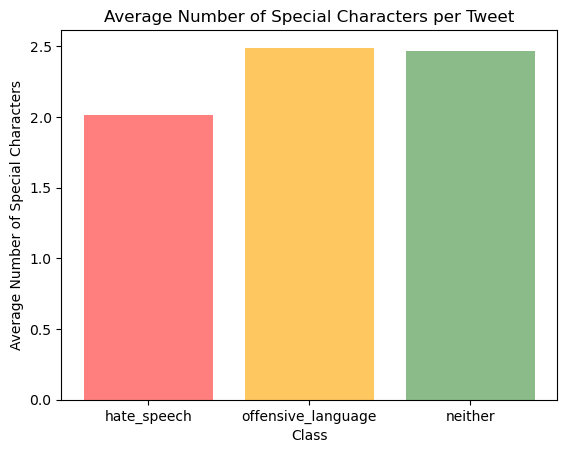

In [4]:
avg_s = [ratio_0, ratio_1, ratio_2]
# Create the bar plot
fig, ax = plt.subplots()
ax.bar(classes, avg_s, color=['#FF7F7F', '#FFC75F', '#8CBB8A'])

# Add labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Average Number of Special Characters')
ax.set_title('Average Number of Special Characters per Tweet')

# Display the plot
plt.show()

## Class Distribution

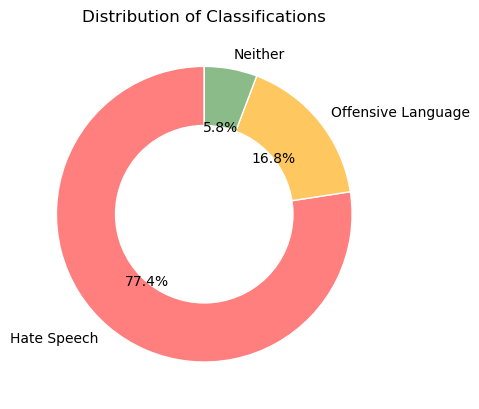

In [5]:
# Count the number of classifications for each class
class_counts = data['class'].value_counts()

# Define class labels and colors
class_labels = ['Hate Speech', 'Offensive Language', 'Neither']
colors = ['#FF7F7F', '#FFC75F', '#8CBB8A']

# Create the donut chart
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Add a circle in the middle to create the donut shape
circle = plt.Circle((0, 0), 0.6, color='white')
ax.add_artist(circle)

# Set aspect ratio to be equal, creating a circular shape
ax.set_aspect('equal')

# Add a title
ax.set_title('Distribution of Classifications')

# Display the chart
plt.show()

## Average Class Votes for each Class
The logic behind assigning a class to each tweet is as follows:

Each tweet is voted on by multiple people, and the number of votes is represented by the "count" column. The class that receives the most votes is selected as the assigned class for the tweet using the "WOC" (Wisdome Of Crowds) method.

To determine the certainty level of the voters for each class, we calculate the average number of votes for each class. This average value must be above 33%.<br>
<br>The major analysis we want to do here is to ensure a certain level of confidence in the assigned class.

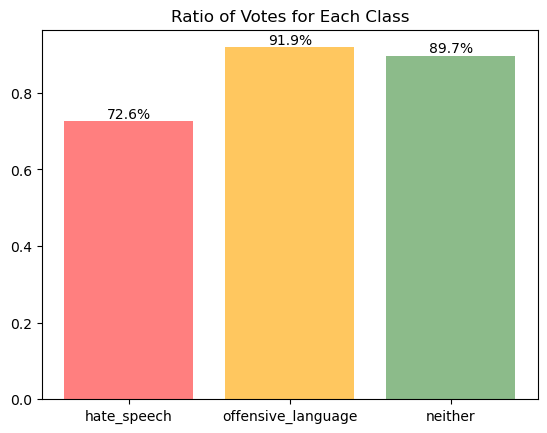

In [6]:
ratios = []

for i in range(3):
    tmp = data[data['class'] == i]
    ratios.append((tmp[classes[i]].sum()/tmp['count'].sum()))
    
fig, ax = plt.subplots()

# Create the bar plot
bars = ax.bar(classes, ratios, color=['#FF7F7F', '#FFC75F', '#8CBB8A'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1%}', ha='center', va='bottom')

# Add a title
ax.set_title('Ratio of Votes for Each Class')

# Display the chart
plt.show()

In [7]:
def preprocess_tweet(tweet):
    # Remove special characters and numbers
    tweet = re.sub('[^a-zA-Z\s]', '', tweet)
    
    # Remove conjunctions
    conjunctions = set(stopwords.words('english'))
    tweet = ' '.join(word for word in tweet.split() if word.lower() not in conjunctions)
    
    # Convert to lowercase
    tweet = tweet.lower()
    
    return tweet

# Apply the preprocessing function to the 'tweet' column and create a new column 'clean_tweet'
data['clean_tweet'] = data['tweet'].apply(preprocess_tweet)

In [8]:
data

,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely woman shouldnt complain cleani...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dats coldtyga dwn bad cuffin dat ...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabylife ever fuck b...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts shit hear might true might f...
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,yous muthafin lie lifeasking pearls coreyemanu...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",youve gone broke wrong heart baby drove rednec...
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...
24781,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitches tellin lies


## World cloud grouped by class

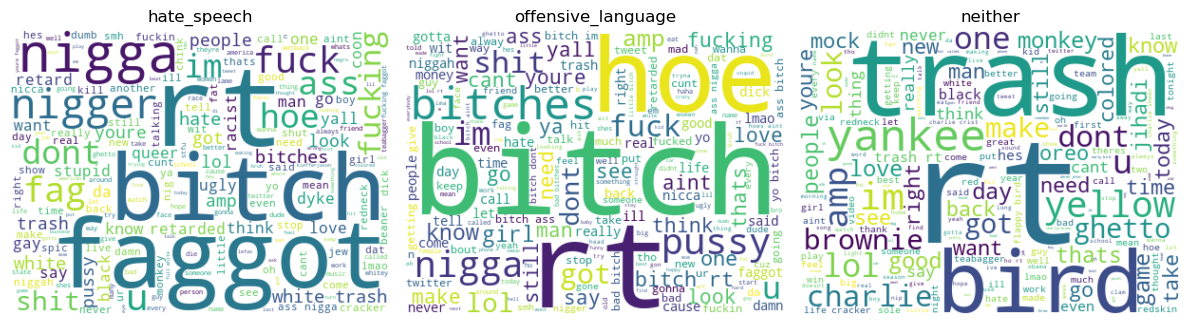

In [9]:
# Create a list of class labels
class_labels = ['hate_speech', 'offensive_language', 'neither']

# Generate word clouds for each class
wordclouds = []
for i, class_label in enumerate(class_labels):
    subset = data[data['class'] == i]
    text = ' '.join(subset['clean_tweet'])
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate(text)
    wordclouds.append((class_label, wordcloud))

# Set up the subplot layout
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot each word cloud on a separate subplot
for i, (class_label, wordcloud) in enumerate(wordclouds):
    ax = axes[i]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(class_label)
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the stacked word clouds
plt.show()

## Average length of tweet per class

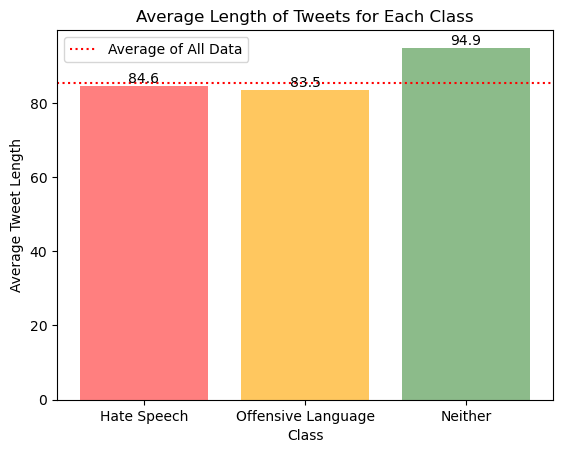

In [10]:
# Calculate the average length of tweets for each class
avg_lengths = []
for i in range(3):
    subset = data[data['class'] == i]
    avg_length = subset['tweet'].str.len().mean()
    avg_lengths.append(avg_length)

# Calculate the average tweet length for the entire dataset
avg_length_total = data['tweet'].str.len().mean()

# Define the class labels
class_labels = ['Hate Speech', 'Offensive Language', 'Neither']

# Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(class_labels, avg_lengths, color=['#FF7F7F', '#FFC75F', '#8CBB8A'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')

# Add a dotted red line for the average tweet length of the entire dataset
ax.axhline(avg_length_total, color='red', linestyle='dotted', label='Average of All Data')

# Add labels and title
ax.set_xlabel('Class')
ax.set_ylabel('Average Tweet Length')
ax.set_title('Average Length of Tweets for Each Class')

ax.legend()

# Display the plot
plt.show()

## Distribution of tweets per class by length

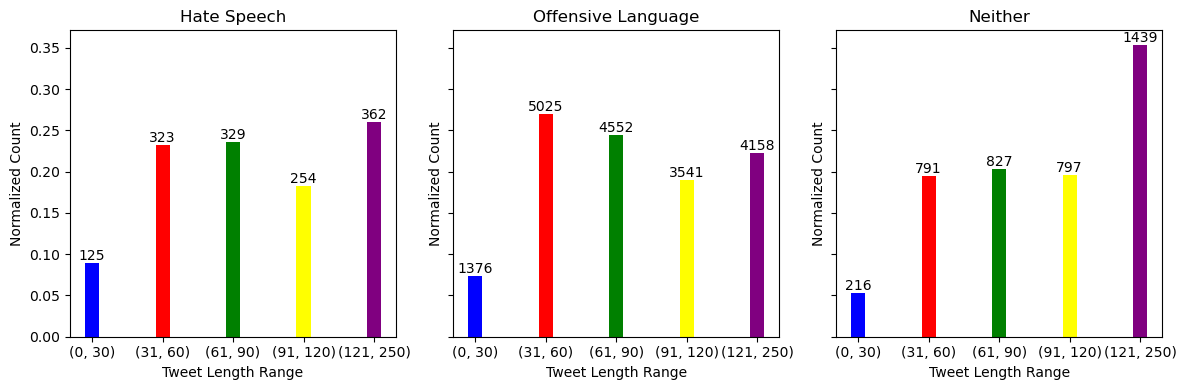

In [11]:
# Define the ranges for the tweet lengths
length_ranges = [(0, 30), (31, 60), (61, 90), (91, 120), (121, 250)]

# Count the number of tweets in each range for each class
counts = []
for length_range in length_ranges:
    range_counts = []
    for i in range(3):
        subset = data[(data['tweet'].str.len() >= length_range[0]) & (data['tweet'].str.len() < length_range[1])]
        range_counts.append(len(subset[subset['class'] == i]))
    counts.append(range_counts)

# Convert the counts into a numpy array for plotting
counts_arr = np.array(counts)

# Define the class labels
class_labels = ['Hate Speech', 'Offensive Language', 'Neither']

# Set the bar width
bar_width = 0.2
# Calculate the total width of each group (class) and the spacing between each class
group_width = bar_width * len(length_ranges)
class_spacing = 0

# Create the three separate bar plots with shared y-axis
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

# Normalize the counts for each class
normalized_counts = counts_arr / counts_arr.sum(axis=0)

# Iterate over the class labels and create a bar plot for each class
for i, class_label in enumerate(class_labels):
    # Calculate the x-coordinates for the bars
    x = np.arange(len(length_ranges))

    # Create the bar plot for the current class
    bars = axes[i].bar(x, normalized_counts[:, i], width=bar_width, color=['blue', 'red', 'green', 'yellow', 'purple'])

    # Add labels and title for each plot
    axes[i].set_xlabel('Tweet Length Range')
    axes[i].set_ylabel('Normalized Count')
    axes[i].set_title(class_label)

    # Set the x-axis tick positions and labels
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(length_ranges)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, int(height * counts_arr.sum(axis=0)[i]), ha='center', va='bottom')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Creating Corpus and Preproccessing 

import pandas as pd
import string
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import math
from collections import defaultdict

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline


from wordcloud import WordCloud
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


In [12]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bendu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bendu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bendu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
# Load the CSV file into a DataFrame
df_tweets = pd.read_csv('labeled_data.csv')

# Display the first few rows of the DataFrame
df_tweets.head()

,ID,class,tweet
0,0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
df_tweets.shape

(24783, 3)

In [15]:
tweets_corpus = df_tweets['tweet'].tolist()

In [16]:
tweets_corpus

["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...",
 '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!',
 '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit',
 '!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny',
 '!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;',
 '!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"',
 '!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"',
 "!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;",
 '" &amp; you might not get ya bitch back &amp; thats t

In [17]:
def preprocess_corpus(corpus,remove_punctuation,tokenize,remove_stopwords):
    preprocessed_corpus = []
    
    # Remove punctuation and convert to lowercase for each tweet in the corpus
    for tweet in corpus:
        tweet = tweet.lower()
        if remove_punctuation:
            tweet = tweet.translate(str.maketrans("", "", string.punctuation))
            

        if tokenize: # Tokenize the tweet
            tokens = word_tokenize(tweet)

        if remove_stopwords:
            stop_words = set(stopwords.words('english'))
            filtered_tokens = [token for token in tokens if token not in stop_words]
        else:
            filtered_tokens = tokens
            
        preprocessed_corpus.append(filtered_tokens)
    
    return preprocessed_corpus

In [18]:
trial_corpus = preprocess_corpus(tweets_corpus,remove_punctuation = True ,tokenize = True ,remove_stopwords =False) 

After trying a few different pre-proccessing combo's we decided to go witht he combintation of:<br>
- Turning Everything to lower case<br>
- Removing punctuation<br>
- Tokinzing<br>
<br>
we decided not to remove stopwords due to relevancy of tweets and evaluations done in previous trial runs.

In [19]:
trial_corpus

[['rt',
  'mayasolovely',
  'as',
  'a',
  'woman',
  'you',
  'shouldnt',
  'complain',
  'about',
  'cleaning',
  'up',
  'your',
  'house',
  'amp',
  'as',
  'a',
  'man',
  'you',
  'should',
  'always',
  'take',
  'the',
  'trash',
  'out'],
 ['rt',
  'mleew17',
  'boy',
  'dats',
  'coldtyga',
  'dwn',
  'bad',
  'for',
  'cuffin',
  'dat',
  'hoe',
  'in',
  'the',
  '1st',
  'place'],
 ['rt',
  'urkindofbrand',
  'dawg',
  'rt',
  '80sbaby4life',
  'you',
  'ever',
  'fuck',
  'a',
  'bitch',
  'and',
  'she',
  'start',
  'to',
  'cry',
  'you',
  'be',
  'confused',
  'as',
  'shit'],
 ['rt', 'cganderson', 'vivabased', 'she', 'look', 'like', 'a', 'tranny'],
 ['rt',
  'shenikaroberts',
  'the',
  'shit',
  'you',
  'hear',
  'about',
  'me',
  'might',
  'be',
  'true',
  'or',
  'it',
  'might',
  'be',
  'faker',
  'than',
  'the',
  'bitch',
  'who',
  'told',
  'it',
  'to',
  'ya',
  '57361'],
 ['tmadisonx',
  'the',
  'shit',
  'just',
  'blows',
  'meclaim',
  'you',


# NLP Vectorization
For the Project we are choosing to use three types of vectorization on our corpus.<br>
1) TFDIF<br>
2) LDA<br>
3) Word2Vec<br>
4) Doc2Vec

## TFIDF

In [20]:
def preprocess_tweet(tweet):
    # Remove special characters and numbers
    tweet = re.sub('[^a-zA-Z\s]', '', tweet)

    # Remove conjunctions
    conjunctions = set(stopwords.words('english'))
    tweet = ' '.join(word for word in tweet.split() if word.lower() not in conjunctions)

    # Convert to lowercase
    tweet = tweet.lower()

    return tweet

In [21]:
tfidf_data = df_tweets['tweet'].apply(preprocess_tweet)

In [22]:
tfidf_data = tfidf_data.tolist()

In [23]:
tfidf_data

['rt mayasolovely woman shouldnt complain cleaning house amp man always take trash',
 'rt mleew boy dats coldtyga dwn bad cuffin dat hoe st place',
 'rt urkindofbrand dawg rt sbabylife ever fuck bitch start cry confused shit',
 'rt cganderson vivabased look like tranny',
 'rt shenikaroberts shit hear might true might faker bitch told ya',
 'tmadisonx shit blows meclaim faithful somebody still fucking hoes',
 'brighterdays sit hate another bitch got much shit going',
 'selfiequeenbri cause im tired big bitches coming us skinny girls',
 'amp might get ya bitch back amp thats',
 'rhythmixx hobbies include fighting mariam bitch',
 'keeks bitch curves everyone lol walked conversation like smh',
 'murda gang bitch gang land',
 'hoes smoke losers yea go ig',
 'bad bitches thing like',
 'bitch get',
 'bitch nigga miss',
 'bitch plz whatever',
 'bitch love',
 'bitches get cut everyday b',
 'black bottle amp bad bitch',
 'broke bitch cant tell nothing',
 'cancel bitch like nino',
 'cant see hoes

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming you have a list called 'documents' containing the 25,000 SMS documents

# Step 1: Initialize the TfidfVectorizer and fit it on the documents
vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = vectorizer.fit_transform(tfidf_data)

# Step 2: Convert the TF-IDF matrix to a DataFrame with feature names
feature_names = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Step 3: Add the 'label' column to the DataFrame
tfidf_df['label'] = df_tweets['class']

In [25]:
new_order = list(tfidf_df.columns.drop('label')) + ['label']
tfidf_df = tfidf_df[new_order]

In [26]:
tfidf_df

,act,actin,acting,actually,af,ago,ah,aint,al,almost,...,yesterday,yet,yo,youll,young,youre,youtube,youve,yu,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,1
24779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.40563,0.0,2
24780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247398,0.0,0.0,...,0.0,0.0,0.0,0.0,0.39039,0.0,0.0,0.00000,0.0,1
24781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0,1


## LDA

### Data Preparation

In [27]:
lda_data = df_tweets.copy()

### Splitting into Train and Test
Splitting the data so for each class well spit it into 30% test and 70% train. FOR EACH CLASS.

In [28]:
# Define the test split percentage
test_split_percentage = 0.3

# Split the data into test and train based on the class column
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for class_number in lda_data['class'].unique():
    class_data = lda_data[lda_data['class'] == class_number]
    train_class, test_class = train_test_split(class_data, test_size=test_split_percentage)
    train_data = pd.concat([train_data, train_class])
    test_data = pd.concat([test_data, test_class])

# Assign the 'purpose' column with 'train' and 'test' values
train_data['purpose'] = 'train'
test_data['purpose'] = 'test'

# Concatenate the train and test data
final_data = pd.concat([train_data, test_data])

# Print the resulting DataFrame
final_data

,ID,class,tweet,purpose
21146,21602,2,Stayin up late to watch #Ichiro #Yankees,train
9736,10001,2,He never replied to my asking about his callin...,train
15898,16267,2,RT @JustReIatabIe: when you die on flappy bird...,train
5281,5436,2,@_BDOE bro u trash at that zombies,train
13724,14060,2,"Oreo Shake, I want you.",train
...,...,...,...,...
5554,5713,0,@atspace your 2. And 3. Nigga them hoes suck w...,test
19897,20338,0,RT @realist_iLLest: Mine too &#128513;&#128588...,test
16887,17274,0,RT @PeterpandaCat: @savanigga Sav is a fag,test
8105,8330,0,Black bitches don't be kickin up in our school...,test


### Converting the Data Type to Corpus

In [29]:
train_tweets_corpus = train_data['tweet'].tolist()
test_tweets_corpus = test_data['tweet'].tolist()

train_corpus = preprocess_corpus(train_tweets_corpus,remove_punctuation = True ,tokenize = True ,remove_stopwords =False) 
test_corpus = preprocess_corpus(test_tweets_corpus,remove_punctuation = True ,tokenize = True ,remove_stopwords =False) 

### Model Initializing

In [30]:
# Create a new PLDA model
lda_model = tp.PLDAModel(min_cf=5, rm_top=0, latent_topics=3, topics_per_label=3, seed=42)

# Add documents to the model
for document in train_corpus:
    lda_model.add_doc(document)

# Train the model
lda_model.train(100)

# Print the top words for each topic
for topic_id in range(lda_model.k):
    words = lda_model.get_topic_words(topic_id)
    print(f"Topic {topic_id}: {words}")

Topic 0: [('the', 0.06064046546816826), ('rt', 0.029801951721310616), ('a', 0.028677357360720634), ('of', 0.025057565420866013), ('to', 0.023845111951231956), ('is', 0.023458531126379967), ('and', 0.020717330276966095), ('in', 0.02045375294983387), ('for', 0.014180620200932026), ('trash', 0.01361832208931446)]
Topic 1: [('you', 0.04077660292387009), ('i', 0.036097705364227295), ('bitch', 0.03162223473191261), ('rt', 0.027497120201587677), ('a', 0.026321744546294212), ('bitches', 0.02310076355934143), ('hoes', 0.01847837306559086), ('to', 0.015031358227133751), ('be', 0.01486183237284422), ('dont', 0.013810775242745876)]
Topic 2: [('bitch', 0.04739569127559662), ('a', 0.04204270616173744), ('i', 0.03128686547279358), ('my', 0.026814961805939674), ('rt', 0.019649941474199295), ('the', 0.019167840480804443), ('to', 0.01664096675813198), ('this', 0.016308482736349106), ('that', 0.016225362196564674), ('in', 0.01607574336230755)]


C:\Users\bendu\AppData\Local\Temp\ipykernel_5600\2505395704.py:9: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  lda_model.train(100)


### Top 10 Words by Our LDA Model

In [31]:
# Create an empty DataFrame to store the topic words and values
df = pd.DataFrame()

# Iterate over each topic
for topic_id in range(lda_model.k):
    # Get the top words and values for the topic
    words = lda_model.get_topic_words(topic_id)
    
    # Create a DataFrame for the current topic
    topic_df = pd.DataFrame(words, columns=[f"Topic {topic_id}_word", f"Topic {topic_id}_value"])
    
    # Append the topic DataFrame to the main DataFrame
    df = pd.concat([df, topic_df], axis=1)

# Reset the index of the DataFrame
df.index = range(1, 11)

df

,Topic 0_word,Topic 0_value,Topic 1_word,Topic 1_value,Topic 2_word,Topic 2_value
1,the,0.060640,you,0.040777,bitch,0.047396
2,rt,0.029802,i,0.036098,a,0.042043
3,a,0.028677,bitch,0.031622,i,0.031287
4,of,0.025058,rt,0.027497,my,0.026815
5,to,0.023845,a,0.026322,rt,0.019650
6,is,0.023459,bitches,0.023101,the,0.019168
7,and,0.020717,hoes,0.018478,to,0.016641
8,in,0.020454,to,0.015031,this,0.016308
9,for,0.014181,be,0.014862,that,0.016225
10,trash,0.013618,dont,0.013811,in,0.016076


### Print model summary

In [32]:
lda_model.summary(topic_word_top_n=10) # https://github.com/bab2min/tomotopy/blob/main/tomotopy/_summary.py

<Basic Info>
| PLDAModel (current version: 0.12.4)
| 17348 docs, 205433 words
| Total Vocabs: 31920, Used Vocabs: 3736
| Entropy of words: 6.30121
| Entropy of term-weighted words: 6.30121
| Removed Vocabs: <NA>
| Label of docs and its distribution
|
<Training Info>
| Iterations: 100, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -6.82375
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 5 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| latent_topics: 3 (the number of latent topics, which are shared to all documents, between 1 ~ 32767)
| topics_per_label: 3 (the number of topics per label between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for 

### Test model accuracy against the test set

In [33]:
topic_names = []
for topic_index in range(lda_model.k):
    if (topic_index // lda_model.topics_per_label) < len(lda_model.topic_label_dict):
        topic_names.append(f"{lda_model.topic_label_dict[topic_index // lda_model.topics_per_label]}")
    else:
        topic_names.append(f"latent {topic_index - len(lda_model.topic_label_dict) * lda_model.topics_per_label}")

# Create a mapping dictionary to map topic names to numbers
topic_mapping = {}
for i, topic_name in enumerate(sorted(set(topic_names))):
    topic_mapping[topic_name] = i

# Convert the topic names to numbers 0 to 2
topic_names = np.array(topic_names)
topic_names = np.vectorize(topic_mapping.get)(topic_names)

topic_names

array([0, 1, 2])

In [34]:
stop_words = set(pd.read_csv('https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/raw/stop-words-english1.txt', header=None)[0].tolist())

def create_document(text, stop_words):
    import tomotopy as tp
    tokenizer = tp.utils.SimpleTokenizer(lowercase=True) # https://github.com/bab2min/tomotopy/blob/main/tomotopy/utils.py    
    text_tokens = tokenizer(text) # split text into tokens
    text_tokens = list(zip(*text_tokens))[0] # get 1st column of the tokenizer result
    text_tokens = [token for token in text_tokens if token not in stop_words ] # drop stop words
    text_tokens = [token for token in text_tokens if not token.isnumeric() and len(token)>1] # remove words with numbers and short words
    return text_tokens

In [35]:
test_set = []
for row_id, row in final_data[final_data['purpose']=='test'].iterrows():
    doc = create_document(row['tweet'], stop_words)
    document_vector, _ = lda_model.infer(lda_model.make_doc(doc))
    test_set.append({
        'labels': row['class'],
        'predicted_classes': topic_names[document_vector.argsort()[-2:]]
    })
test_set = pd.DataFrame(test_set)    
test_set

,labels,predicted_classes
0,2,"[2, 1]"
1,2,"[2, 0]"
2,2,"[1, 0]"
3,2,"[0, 1]"
4,2,"[1, 0]"
...,...,...
7430,0,"[2, 1]"
7431,0,"[0, 1]"
7432,0,"[1, 2]"
7433,0,"[2, 1]"


## Final Model Accuracy

In [36]:
def check_overlap(row):
    labels = row['labels']
    if isinstance(labels, int):
        labels = [labels]  # Convert single label to a list
    if len(labels) == 0:
        return np.NaN
    return len(set(labels).intersection(row['predicted_classes'])) > 0

test_results = test_set.apply(check_overlap, axis=1).dropna()
print(f"LDA Model Accuracy {test_results.mean():.2f}")

LDA Model Accuracy 0.82


## Word2Vec

### Finding best parameters
Here we are using the word2vec methodology before creating the vectorized dataframe we want to find the best <br>
word2vec parameters to use. We will do by checking spearman and pearson correlations using the wordsim535 file <br>
provided in the course.

**Defining parameter combo's we want to test**

In [37]:
W2V_params0 = {'vector_size': 100, 'window': 5, 'min_count': 1, 'epochs': 5, 'sg': 0, 'min_alpha': 0.0001} 

W2V_params1 = {'vector_size': 1200, 'window': 7, 'min_count': 1, 'epochs': 5, 'sg': 0, 'min_alpha': 0.0001}

W2V_params2 = {'vector_size': 50, 'window': 7, 'min_count': 1, 'epochs': 5, 'sg': 0, 'min_alpha': 0.0001} 

W2V_params3 = {'vector_size': 300, 'window': 15, 'min_count': 1, 'epochs': 5, 'sg': 0, 'min_alpha': 0.0001}

W2V_params4 = {'vector_size': 300, 'window': 7, 'min_count': 50, 'epochs': 5, 'sg': 0, 'min_alpha': 0.0001}

W2V_params5 = {'vector_size': 300, 'window': 7, 'min_count': 1, 'epochs': 50, 'sg': 0, 'min_alpha': 0.0001}

W2V_params6 = {'vector_size': 300, 'window': 7, 'min_count': 1, 'epochs': 5, 'sg': 1, 'min_alpha': 0.0001} 

W2V_params7 = {'vector_size': 100, 'window': 5, 'min_count': 1, 'epochs': 50, 'sg': 0, 'min_alpha': 0.0001} 

**Initializing and training models with various params**

In [38]:
W2V_model_default = Word2Vec(trial_corpus, **W2V_params0)  # Default parameters

W2V_model_large_vector = Word2Vec(trial_corpus, **W2V_params1)  # Large vector size

W2V_model_small_vector = Word2Vec(trial_corpus, **W2V_params2)  # Small vector size

W2V_model_wide_window = Word2Vec(trial_corpus, **W2V_params3)  # Wide window size

W2V_model_high_min_count = Word2Vec(trial_corpus, **W2V_params4)  # High min_count value

W2V_model_long_epochs = Word2Vec(trial_corpus, **W2V_params5)  # Long training epochs

W2V_model_skip_gram = Word2Vec(trial_corpus, **W2V_params6)  # Skip-gram training algorithm

W2V_model_high_alpha = Word2Vec(trial_corpus, **W2V_params7)  # High learning rate (alpha)

**Loading Wordsim doc for comparison**

In [39]:
word_similarities_file = pd.read_csv('wordsim353.tsv', delimiter='\t', skiprows=1, names=['Word 1', 'Word 2', 'Human Similarity'])

**Helper Functions**

In [40]:
def model_running(model, word_similarities):
    def calculate_similarity(word1, word2):
        try:
            similarity = model.wv.similarity(word1, word2) * 10
        except KeyError:
            similarity = None
        return similarity

    # Calculate similarity scores for word pairs in the file
    word_similarities['Model Similarity'] = word_similarities.apply(lambda row: calculate_similarity(row['Word 1'], row['Word 2']), axis=1)

    word_similarities['Human Similarity'] = pd.to_numeric(word_similarities['Human Similarity'], errors='coerce')

    # Compare model's similarity scores with human similarity ratings
    word_similarities['Difference'] = abs(word_similarities['Human Similarity'] - word_similarities['Model Similarity'])
    
    return word_similarities

def calculate_correlation(df):
    # Calculate Spearman correlation coefficient
    spearman_corr, _ = spearmanr(df["Human Similarity"], df["Model Similarity"])

    # Calculate Pearson correlation coefficient
    pearson_corr, _ = pearsonr(df["Human Similarity"], df["Model Similarity"])

    return spearman_corr, pearson_corr

**Setting up df to hold model outputs**

In [41]:
W2V_models_names = [
    "Default Parameters",
    "Large Vector Size",
    "Small Vector Size",
    "Wide Window Size",
    "High min_count",
    "Long Training Epochs",
    "Skip-Gram Training",
    "High Learning Rate"
]

# Create the dataframe with the 'Model Name' column
W2V_models_output = pd.DataFrame(columns=["Model Name", "Spearman", "Pearson"])

W2V_models_output["Model Name"] = W2V_models_names

**Running Comparison**

In [42]:
W2V_models = [W2V_model_default,
          W2V_model_large_vector,
          W2V_model_small_vector,
          W2V_model_wide_window,
          W2V_model_high_min_count,
          W2V_model_long_epochs,
          W2V_model_skip_gram,
          W2V_model_high_alpha]

for i in range(len(W2V_models_output)):
    output = model_running(W2V_models[i], word_similarities_file)
    output = output.dropna()
    W2V_models_output.loc[i, "Spearman"], W2V_models_output.loc[i, "Pearson"] = calculate_correlation(output)

**Chekcing Results**

In [43]:
W2V_models_output

,Model Name,Spearman,Pearson
0,Default Parameters,0.028062,-0.024196
1,Large Vector Size,0.026665,-0.110808
2,Small Vector Size,0.063237,0.040448
3,Wide Window Size,0.02791,-0.059022
4,High min_count,-0.2,-0.0351
5,Long Training Epochs,0.150114,0.187391
6,Skip-Gram Training,-0.005622,0.000243
7,High Learning Rate,0.155576,0.181973


### Exploring best model
We can see in the table above that 6th model is the best both in terms of spearman and pearson

In [44]:
# Train the Word2Vec model
word2vec_model = W2V_model_long_epochs

# Get the word vectors
word_vectors = word2vec_model.wv

### Examples showing the model works

In [45]:
# Find similar words based on vector similarity
similar_words = word_vectors.most_similar('cheese')

# Print similar words
for word, similarity in similar_words:
    print(word, similarity)

mac 0.5654133558273315
cookies 0.5476018190383911
fries 0.5386784672737122
stacked 0.509416401386261
spungecake 0.5076591372489929
skies 0.5057051777839661
infections 0.5047925710678101
httptcomy5ojyz8w9 0.5039229989051819
mirajane 0.5032604932785034
lobster 0.5026841759681702


In [46]:
# Find similar words based on vector similarity
similar_words = word_vectors.most_similar('win')

# Print similar words
for word, similarity in similar_words:
    print(word, similarity)

mets 0.5190724730491638
yankees 0.506603479385376
tanaka 0.5039705038070679
play 0.5033890604972839
inevitably 0.4935275912284851
ruin 0.48496079444885254
core4 0.4725441634654999
lead 0.4699086844921112
competing 0.46238043904304504
1goodlookingman 0.4573458135128021


### Generating df for classification model

In [47]:
# Function to average word vectors of a document
def average_word_vectors(document, word_vectors, vector_size):
    feature_vector = np.zeros((vector_size,), dtype="float32")
    num_words = 0
    for word in document:
        if word in word_vectors:
            feature_vector = np.add(feature_vector, word_vectors[word])
            num_words += 1
    if num_words > 0:
        feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

# Function to generate features dataframe from word vectors
def generate_features_dataframe(corpus, word_vectors, vector_size):
    features = []
    for document in corpus:
        feature_vector = average_word_vectors(document, word_vectors, vector_size)
        features.append(feature_vector)
    return pd.DataFrame(features)

In [48]:
# Generate features dataframe
W2V_features = generate_features_dataframe(trial_corpus, word2vec_model.wv, vector_size=300)

# Add labels to the dataframe
W2V_features['label'] = df_tweets['class']

# Shuffle the dataframe (if needed)
W2V_features = W2V_features.sample(frac=1, random_state=42).reset_index(drop=True)

In [49]:
W2V_features

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-0.182090,-0.000260,-0.448481,-0.713419,0.262113,0.741896,0.095467,-0.876112,0.754540,-0.062232,...,0.096710,-0.249212,-0.614838,0.143975,-0.258653,-0.110014,0.742745,0.450163,-0.338405,1
1,-0.274899,0.775649,0.174561,-0.835046,0.172999,0.802402,0.421398,0.074579,0.374964,-0.180479,...,-0.089075,-0.579193,-0.525915,0.072431,-0.327841,0.046961,0.344156,0.151392,-0.488306,1
2,-0.016606,0.412499,0.017940,-0.256626,0.411402,0.619451,0.647750,0.000492,0.372122,0.122278,...,-0.269366,0.158323,-0.378356,-0.068517,-0.935867,-0.092681,0.769788,-0.145567,0.443142,2
3,0.404794,0.080695,-0.061090,-0.579619,0.492879,0.381274,0.157234,0.153731,0.678268,0.114627,...,-0.264667,-0.162507,-0.292290,0.178645,-0.175386,-0.114856,0.132007,0.106998,-0.059270,1
4,0.376978,0.170994,0.287014,-0.777476,-0.182100,1.355267,-0.424993,-0.610452,0.299603,0.117537,...,0.133970,-0.712486,-0.394968,-0.281989,-0.797376,-0.801303,0.488213,-0.284493,0.424032,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,0.203987,-0.227334,0.101976,-0.234774,0.139646,0.060741,-0.073861,-0.370243,0.304560,0.288411,...,0.140308,0.558933,0.215046,0.046660,-0.257916,-0.101192,0.212336,-0.242525,0.650684,2
24779,0.164327,0.259423,-0.228014,-0.528499,0.516343,0.836142,0.312466,-0.386156,0.313131,-0.110231,...,-0.112132,-0.084807,-0.589387,0.080054,-0.496318,-0.190008,0.533721,-0.092265,-0.202095,1
24780,0.423924,0.296751,0.093859,0.308209,-0.059582,-0.349241,0.027044,0.237556,-0.224039,0.207581,...,0.741161,0.519887,0.186809,-0.204572,0.186366,0.076774,-0.441198,0.072788,-0.068003,1
24781,0.193902,0.325318,0.153990,0.329713,0.052347,0.750171,0.047955,-0.544063,-0.086681,0.199159,...,-0.196885,-0.002498,0.277989,-0.183741,0.017698,-0.142629,0.137028,0.114838,0.302266,1


## Dov2Vec

In [50]:
# Convert the preprocessed corpus to a list of TaggedDocuments
tagged_documents = [TaggedDocument(words=doc, tags=[i]) for i, doc in enumerate(trial_corpus)]

### Finding best paramters
Here we are going to run a loop to comapre various doc2vec paramters.<br>
Once twe find the best parameters we will initialize a model with those paramters and prepare the output vectors <br>
as a df that can be fed to a classification model. 

**Defining various parameter values to test**

In [51]:
D2V_params0 = {'vector_size': 100, 'window': 7, 'min_count': 2, 'epochs': 5, 'min_alpha': 0.0001} 

D2V_params1 = {'vector_size': 300, 'window': 7, 'min_count': 2, 'epochs': 5, 'min_alpha': 0.0001}

D2V_params2 = {'vector_size': 50, 'window': 7, 'min_count': 2, 'epochs': 5, 'min_alpha': 0.0001} 

D2V_params3 = {'vector_size': 300, 'window': 15, 'min_count': 2, 'epochs': 5, 'min_alpha': 0.0001}

D2V_params4 = {'vector_size': 300, 'window': 7, 'min_count': 50, 'epochs': 5, 'min_alpha': 0.0001}

D2V_params5 = {'vector_size': 300, 'window': 7, 'min_count': 2, 'epochs': 50, 'min_alpha': 0.0001}

D2V_params6 = {'vector_size': 300, 'window': 7, 'min_count': 2, 'epochs': 5, 'min_alpha': 0.0001} 

D2V_params7 = {'vector_size': 300, 'window': 7, 'min_count': 2, 'epochs': 5, 'min_alpha': 0.01}

D2V_params8 = {'vector_size': 100, 'window': 4, 'min_count': 1, 'epochs': 50, 'min_alpha': 0.0001}

**Initialziing models with given params**

In [52]:
D2V_model_default = Doc2Vec(tagged_documents, **D2V_params0)  # Default parameters

D2V_model_large_vector = Doc2Vec(tagged_documents, **D2V_params1)  # Large vector size

D2V_model_small_vector = Doc2Vec(tagged_documents, **D2V_params2)  # Small vector size

D2V_model_wide_window = Doc2Vec(tagged_documents, **D2V_params3)  # Wide window size

D2V_model_high_min_count = Doc2Vec(tagged_documents, **D2V_params4)  # High min_count value

D2V_model_long_epochs = Doc2Vec(tagged_documents, **D2V_params5)  # Long training epochs

D2V_model_skip_gram = Doc2Vec(tagged_documents, **D2V_params6)  # Skip-gram training algorithm

D2V_model_high_alpha = Doc2Vec(tagged_documents, **D2V_params7)  # High learning rate (alpha)

D2V_model_default_high_epochs = Doc2Vec(tagged_documents, **D2V_params8)  

**Loading doc to help with similarity check**<br>
We are using the wordsim353 doc given in the course to check spearman and pearson correlations

In [53]:
word_similarities_file = pd.read_csv('wordsim353.tsv', delimiter='\t', skiprows=1, names=['Word 1', 'Word 2', 'Human Similarity'])

**Helper Functions**

In [54]:
def model_running(model, word_similarities):
    def calculate_similarity(word1, word2):
        try:
            similarity = model.wv.similarity(word1, word2) * 10
        except KeyError:
            similarity = None
        return similarity

    # Calculate similarity scores for word pairs in the file
    word_similarities['Model Similarity'] = word_similarities.apply(lambda row: calculate_similarity(row['Word 1'], row['Word 2']), axis=1)

    word_similarities['Human Similarity'] = pd.to_numeric(word_similarities['Human Similarity'], errors='coerce')

    # Compare model's similarity scores with human similarity ratings
    word_similarities['Difference'] = abs(word_similarities['Human Similarity'] - word_similarities['Model Similarity'])
    
    return word_similarities

def calculate_correlation(df):
    # Calculate Spearman correlation coefficient
    spearman_corr, _ = spearmanr(df["Human Similarity"], df["Model Similarity"])

    # Calculate Pearson correlation coefficient
    pearson_corr, _ = pearsonr(df["Human Similarity"], df["Model Similarity"])

    return spearman_corr, pearson_corr

**Setting up comparison table**

In [55]:
D2V_models_names = [
    "Default Parameters",
    "Large Vector Size",
    "Small Vector Size",
    "Wide Window Size",
    "High min_count",
    "Long Training Epochs",
    "Skip-Gram Training",
    "High Learning Rate",
    "Last Try"
]

# Create the dataframe with the 'Model Name' column
D2V_models_output = pd.DataFrame(columns=["Model Name", "Spearman", "Pearson"])

D2V_models_output["Model Name"] = D2V_models_names

**Running Evaluation**

In [56]:
D2V_models = [D2V_model_default,
          D2V_model_large_vector,
          D2V_model_small_vector,
          D2V_model_wide_window,
          D2V_model_high_min_count,
          D2V_model_long_epochs,
          D2V_model_skip_gram,
          D2V_model_high_alpha,
          D2V_model_default_high_epochs]

for i in range(len(D2V_models_output)):
    output = model_running(D2V_models[i], word_similarities_file)
    output = output.dropna()
    D2V_models_output.loc[i, "Spearman"], D2V_models_output.loc[i, "Pearson"] = calculate_correlation(output)

**Lets check the results**

In [57]:
D2V_models_output

,Model Name,Spearman,Pearson
0,Default Parameters,0.032881,0.08235
1,Large Vector Size,0.035418,-0.045757
2,Small Vector Size,0.048488,0.012489
3,Wide Window Size,0.028941,0.009741
4,High min_count,0.2,0.166413
5,Long Training Epochs,0.264672,0.293948
6,Skip-Gram Training,0.011664,0.058628
7,High Learning Rate,0.041145,-0.007701
8,Last Try,0.17434,0.209177


**Model Decision**<br>
<br>
Looking at the summary graph we can see that based on both spearman and pearson correlations model 5 is the most accurate <br>
therefore for our Doc2Vec Model we are choosing those parameters.

### Checking Out Model

In [58]:
doc2vec_model = D2V_model_long_epochs

In [59]:
# Checking the ability to vectorize new tweet
print(doc2vec_model.infer_vector("did we win last night".split()))

[-7.52338246e-02 -1.53587600e-02 -1.02985367e-01 -8.27512071e-02
  3.31632853e-01  1.41281947e-01 -2.34664790e-02 -2.17480212e-01
  1.16137341e-01 -3.05279613e-01 -1.13174871e-01 -1.12074846e-02
 -3.42821181e-01 -2.66600639e-01 -1.70788839e-01 -8.02491512e-03
  6.76758066e-02  9.86933634e-02 -4.72545743e-01  4.56552394e-02
 -1.02960013e-01  3.70393768e-02  1.61159739e-01 -1.89661562e-01
  3.00842542e-02 -1.83420062e-01 -3.72125566e-01  2.26458367e-02
  3.12920064e-02 -4.72375154e-02 -2.06807464e-01  1.04970530e-01
 -3.08402359e-01  1.85874924e-02  8.14059228e-02  3.86268973e-01
  1.02920188e-02 -4.34734300e-02  2.65660100e-02 -4.58549522e-02
  1.10883065e-01 -7.09000155e-02 -2.32025050e-02 -2.03953236e-01
  1.28272071e-01  2.18499407e-01  2.49846876e-01  4.69954759e-02
 -2.35508606e-01  3.39225262e-01 -2.62189806e-01  8.81577879e-02
  2.10878924e-01  6.07592613e-02 -5.10054789e-02  3.27221692e-01
  2.17620775e-01  1.79338366e-01  9.39514954e-03 -2.10596800e-01
  8.39523897e-02 -5.64783

In [60]:
# Example search query
search_query = "yo yo yo"

# Get document embeddings 
doc2vec_embedding = doc2vec_model.infer_vector(simple_preprocess(search_query))

# Perform document retrieval
doc2vec_similar_documents = doc2vec_model.docvecs.most_similar([doc2vec_embedding])


sum_similarity = 0
count = 0

print("Similar Documents (Doc2Vec):")
for document_id, similarity in doc2vec_similar_documents:
    print(f"Document ID: {document_id}, Similarity: {similarity}")
    sum_similarity += similarity
    count += 1
avg_similarity_Doc2Vec = sum_similarity/count

print("For Doc2Vec model, the average similarity is", avg_similarity_Doc2Vec)

Similar Documents (Doc2Vec):
Document ID: 6386, Similarity: 0.8087111711502075
Document ID: 23201, Similarity: 0.768640398979187
Document ID: 90, Similarity: 0.7684504389762878
Document ID: 16750, Similarity: 0.7626126408576965
Document ID: 17678, Similarity: 0.7617976665496826
Document ID: 8783, Similarity: 0.7606916427612305
Document ID: 5496, Similarity: 0.7542546987533569
Document ID: 20426, Similarity: 0.7501460909843445
Document ID: 21253, Similarity: 0.7422806620597839
Document ID: 21788, Similarity: 0.73646479845047
For Doc2Vec model, the average similarity is 0.7614050209522247


### Generating df for classification model

In [61]:
# Generate features dataframe
doc_vectors = [doc2vec_model.infer_vector(doc.words) for doc in tagged_documents]
doc_features_df = pd.DataFrame(doc_vectors)

# Add labels to the dataframe
doc_features_df['label'] = df_tweets['class']

# Shuffle the dataframe (if needed)
doc_features_df = doc_features_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [62]:
doc_features_df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,label
0,-0.342406,0.258583,-0.003918,0.298453,0.127693,-0.192107,0.106520,-0.032129,0.133434,0.078551,...,0.098836,-0.146530,0.006218,0.176733,0.013576,-0.066750,0.056688,-0.109111,-0.002401,1
1,-0.007779,-0.169189,0.032404,-0.024357,0.158105,-0.135339,-0.002158,-0.677424,0.331814,-0.429222,...,0.476801,-0.043954,-0.231437,-0.023031,0.037070,-0.203674,0.319121,0.263023,-0.094163,1
2,-0.032791,-0.792266,-0.145998,-0.604743,-0.127717,0.805829,0.454628,0.259561,0.467230,0.073235,...,0.519216,-0.351453,-0.091289,0.355928,-0.249737,-0.450248,0.597254,-0.153656,0.098784,2
3,0.080400,0.026676,-0.225018,-0.060636,0.110536,0.428812,-0.426249,0.086150,0.440764,-0.181974,...,0.344988,0.174438,-0.107155,0.289385,-0.298940,0.152315,0.489892,0.160229,-0.119989,1
4,0.112553,0.099549,0.399132,0.257130,-0.092903,-0.156838,0.047503,-0.125371,-0.020135,-0.115616,...,-0.327336,-0.022102,0.522146,-0.179050,-0.049858,-0.096195,0.207476,-0.158353,0.381898,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24778,-0.106273,-0.354416,-0.301028,0.029360,-0.006225,0.118004,0.270337,0.077721,0.261893,-0.258584,...,0.136921,-0.110419,0.051088,0.340102,-0.165084,-0.137086,-0.025579,-0.091350,0.003203,2
24779,0.058537,0.219708,0.040018,0.275437,0.887664,0.373691,0.859017,0.132521,-0.050809,-0.606692,...,0.355431,0.034557,-0.196574,-0.074703,0.066004,0.087180,0.088168,-0.195166,-0.253875,1
24780,0.024722,0.096434,0.130757,0.049956,-0.011844,-0.075498,0.078413,-0.028693,-0.034853,0.215726,...,0.172917,0.118340,0.081199,-0.110085,0.020672,0.123378,-0.059836,0.052390,0.062514,1
24781,-0.034631,-0.100955,-0.163297,0.053826,-0.220323,-0.141164,-0.013834,-0.212065,-0.524414,-0.129491,...,-0.072739,-0.232916,0.204407,-0.082675,0.009563,0.213370,-0.372091,0.275601,0.078350,1


# Classification Models 

The final stage in our project is taking our data (translated from a textual corpus to numerical vectors) and trying to <br>
train a highly accurate classification model. The idea in the end would be the ability to create a pipeline where textual data <br>
is inserted into the NLP model and translated into a df that can then be inserted into a classifier and produce presdictions.<br>
<br>
We decided to try out three common classifiers who in our experience are able to provide accurate predictions:<br>
    *logistic regression*<br>
    *XG_Boost* <br>
    *Random Forrest*<br>
<br>
We will train each of these models with each of our NLP data types and then choose the optimal model based on average <br>
validation accuracy. Following the choice of model we will check the models performance for each NLP model translation (using a <br>
holdout set that hasnt been touched) and based on the fianl results will deem which combination is the best.<br>
<br>
**The goal of this section is to decide which NLP 'translator' + ML classifier combo produces the best predictions.**

## Creating Helper Functions
Each function takes a df splits it into training, validation and test sets.<br>
The models then train and are tested on the validation set.<br>
The function returns the X_test, y_test, and trained Model. 

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [64]:
def logistic_regression(df):

    # Splitting the data into features (X) and the label (y)
    X = df.iloc[:, :-1]  # Selecting all columns except the last one
    y = df['label']

    # Splitting the data into training, validation, and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initializing and training the logistic regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Making predictions on the validation set
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Evaluating the performance of the model on the validation set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Creating an evaluation table
    data = {
        'Metric': ['Train_Accuracy','Validation Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score'],
        'Value': [train_accuracy,val_accuracy, val_precision, val_recall, val_f1]
    }
    evaluation_table = pd.DataFrame(data)

    # Printing the evaluation table
    print("Logistic Regression Output")
    print(evaluation_table)
    
    return X_test, y_test, model

In [65]:
def xgboost_model(df):
    # Splitting the data into features (X) and the label (y)
    X = df.iloc[:, :-1]  # Selecting all columns except the last one
    y = df['label']

    # Splitting the data into training, validation, and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Initializing and training the XGBoost model
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # Making predictions on the validation set
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Evaluating the performance of the model on the validation set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Creating an evaluation table
    data = {
        'Metric': ['Train_Accuracy','Validation Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score'],
        ' Value': [train_accuracy,val_accuracy, val_precision, val_recall, val_f1]
    }
    evaluation_table = pd.DataFrame(data)

    # Printing the evaluation table
    print("XG_Boost Output")
    print(evaluation_table)
    
    return X_test, y_test, model

In [66]:
def random_forest_model(df):
    # Splitting the data into features (X) and the label (y)
    X = df.iloc[:, :-1]  # Selecting all columns except the last one
    y = df['label']

    # Splitting the data into training, validation, and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Initializing and training the Random Forest model
    model = RandomForestClassifier()
    model.fit(X_train, y_train)

    # Making predictions on the validation set
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Evaluating the performance of the model on the validation set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Creating an evaluation table
    data = {
        'Metric': ['Train_Accuracy', 'Validation Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score'],
        'Value': [train_accuracy, val_accuracy, val_precision, val_recall, val_f1]
    }
    evaluation_table = pd.DataFrame(data)

    # Printing the evaluation table
    print("Random Forest Classifier Output")
    print(evaluation_table)

    return X_test, y_test, model

## Running Models

### Logistic Regression

In [67]:
print("~~~~~~~~~~~~~~~~~~~~~~")
print("Logistic Regression:")
print("~~~~~~~~~~~~~~~~~~~~~~")
print("TD-IDF")
tfidf_test1,tfidf_label1,tfidf_model1 = logistic_regression(tfidf_df)
print("--------------------")
print("Word2Vec")
W2V_test1,W2V_label1,W2V_model1 = logistic_regression(W2V_features)
print("--------------------")
print("Doc2Vec")
D2V_test1,D2V_label1,D2V_model1 = logistic_regression(doc_features_df)

~~~~~~~~~~~~~~~~~~~~~~
Logistic Regression:
~~~~~~~~~~~~~~~~~~~~~~
TD-IDF


C:\Users\bendu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Output
                Metric     Value
0       Train_Accuracy  0.913649
1  Validation Accuracy  0.889248
2        Val Precision  0.873146
3           Val Recall  0.889248
4         Val F1 Score  0.877251
--------------------
Word2Vec


C:\Users\bendu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Output
                Metric     Value
0       Train_Accuracy  0.886008
1  Validation Accuracy  0.889248
2        Val Precision  0.876095
3           Val Recall  0.889248
4         Val F1 Score  0.875148
--------------------
Doc2Vec
Logistic Regression Output
                Metric     Value
0       Train_Accuracy  0.837940
1  Validation Accuracy  0.830946
2        Val Precision  0.804601
3           Val Recall  0.830946
4         Val F1 Score  0.809311


C:\Users\bendu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### XG_Boost

In [68]:
print("~~~~~~~~~~~~~~~~~~~~~~")
print("XG_Boost:")
print("~~~~~~~~~~~~~~~~~~~~~~")
print("TD-IDF")
tfidf_test2,tfidf_label2,tfidf_model2 = xgboost_model(tfidf_df)
print("--------------------")
print("Word2Vec")
W2V_test2,W2V_label2, W2V_model2 = xgboost_model(W2V_features)
print("--------------------")
print("Doc2Vec")
D2V_test2,D2V_label2,D2V_model2 = xgboost_model(doc_features_df)

~~~~~~~~~~~~~~~~~~~~~~
XG_Boost:
~~~~~~~~~~~~~~~~~~~~~~
TD-IDF
XG_Boost Output
                Metric     Value
0       Train_Accuracy  0.931400
1  Validation Accuracy  0.899395
2        Val Precision  0.893879
3           Val Recall  0.899395
4         Val F1 Score  0.892737
--------------------
Word2Vec
XG_Boost Output
                Metric     Value
0       Train_Accuracy  0.999874
1  Validation Accuracy  0.865860
2        Val Precision  0.844088
3           Val Recall  0.865860
4         Val F1 Score  0.847557
--------------------
Doc2Vec
XG_Boost Output
                Metric     Value
0       Train_Accuracy  1.000000
1  Validation Accuracy  0.829551
2        Val Precision  0.808356
3           Val Recall  0.829551
4         Val F1 Score  0.794338


### Random Forrest

In [69]:
print("~~~~~~~~~~~~~~~~~~~~~~")
print("Random Forrest:")
print("~~~~~~~~~~~~~~~~~~~~~~")
print("TD-IDF")
tfidf_test3,tfidf_label3,tfidf_model3 = random_forest_model(tfidf_df)
print("--------------------")
print("Word2Vec")
W2V_test3,W2V_label3,W2V_model3 = random_forest_model(W2V_features)
print("--------------------")
print("Doc2Vec")
D2V_test3,D2V_label3,D2V_model3 = random_forest_model(doc_features_df)

~~~~~~~~~~~~~~~~~~~~~~
Random Forrest:
~~~~~~~~~~~~~~~~~~~~~~
TD-IDF
Random Forest Classifier Output
                Metric     Value
0       Train_Accuracy  0.992560
1  Validation Accuracy  0.897378
2        Val Precision  0.880930
3           Val Recall  0.897378
4         Val F1 Score  0.884215
--------------------
Word2Vec
Random Forest Classifier Output
                Metric     Value
0       Train_Accuracy  0.999874
1  Validation Accuracy  0.850227
2        Val Precision  0.829750
3           Val Recall  0.850227
4         Val F1 Score  0.820507
--------------------
Doc2Vec
Random Forest Classifier Output
                Metric     Value
0       Train_Accuracy  1.000000
1  Validation Accuracy  0.792738
2        Val Precision  0.809132
3           Val Recall  0.792738
4         Val F1 Score  0.711788


# Final Combination
We chose the logistic regression model we will now run that models predictions using the holdout sets returned by the <br>functions.

In [71]:
# Running predictions based on test data from logistic regression
TFIDF_pred = tfidf_model1.predict(tfidf_test1)
W2V_pred = W2V_model1.predict(W2V_test1)
D2V_pred = D2V_model1.predict(D2V_test1)

# Checking Accuracy
TFIDF_accurracy = accuracy_score(tfidf_label1, TFIDF_pred)
W2V_accurracy = accuracy_score(W2V_label1, W2V_pred)
D2V_accurracy = accuracy_score(D2V_label1, D2V_pred)


print('~~~~~~~~~~~~~Test Accuracy~~~~~~~~~~~~~')
print('TF-IDF:',TFIDF_accurracy)
print('Word2Vec:',W2V_accurracy)
print('Doc2Vec:',D2V_accurracy)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

~~~~~~~~~~~~~Test Accuracy~~~~~~~~~~~~~
TF-IDF: 0.8892475287472261
Word2Vec: 0.8892475287472261
Doc2Vec: 0.8309461367762759
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


We can see that on the test data the combo of logistic regression with both TFIDF and Word2Vec data produce ~88% accuracy.<br>
We think both are viable options but given the larger change between train and test data in the TDIDF combo we would stick <br>
to Word2Vec for now.<br>
It is important to state that in the future taking more steps towards ML model optimization we believe we'd be able to <br>
obtain higher accuracy for all combinations.